# Survival Multiarmed Bandits

## Comparing Multiple Algorithms using Repetitions

In [1]:
#pipy packages
!pip install -q SMPyBandits

     |████████████████████████████████| 552kB 4.7MB/s 
     |████████████████████████████████| 81kB 15.0MB/s 


In [2]:
#link to google drive for importing .py files
from google.colab import drive
drive.mount('/content/drive')
localpath = '/content/drive/My Drive/Colab Notebooks/MultiArmedBandits/MyMAB/'

#local packages
from importlib.machinery import SourceFileLoader
mabarms = SourceFileLoader('mabarms', localpath + 'mabarms.py').load_module()
mabalgs = SourceFileLoader('mabalgs', localpath + 'mabalgs.py').load_module()
mabsim = SourceFileLoader('mabsim', localpath +  'mabsim.py').load_module()
mabplot = SourceFileLoader('mabplot', localpath + 'mabplot.py').load_module()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Dependencies

import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
#%matplotlib notebook
#import pickle

#Arms
from SMPyBandits.Arms import Bernoulli #, Gaussian, Constant
#from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import Uniform, EmpiricalMeans, UCB, UCBalpha, UCBV, klUCB, Thompson, SoftMix, BayesUCB
from mabalgs import SafeEpsilonGreedy, SafeUCB, SafeUCBalpha, ClassicEpsilonGreedy, ClassicEpsilonDecreasing, ClassicOptimisticGreedy, SafeKLUCB, PositiveGamblerUCB, GamblerBayesUCB, MaRaB

#Sim
from mabsim import mabs
from mabplot import mabplt

## Setting (10-Bernoulli-Arms)

In [0]:
plt.rcParams['figure.figsize'] = (16, 8)

# BERNOULLI ARMS :

#means = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55])
#means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
#means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
#means = np.concatenate((np.repeat(0.1, 30), np.repeat(0.6, 5), [0.8]))

k = 10
means = np.linspace(0.0, 0.6, k)

#EXTENDED BERNOULLI
#maxr = +1.0
#minr = -1.0
#ampl = maxr - minr
#A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

#BERNOULLI
maxr = 1
minr = 0
ampl = 1
A = [Bernoulli(m) for m in means]

In [0]:
#initial budget
b_0 = 20.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s), #lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     #UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     UCB(k, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl),
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     UCBV(k, lower=minr, amplitude=ampl),
     Thompson(k, lower=minr, amplitude=ampl),
     BayesUCB(k, lower=minr, amplitude=ampl)
    ]

crits = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Survival Time (std dev)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Time on Negative Budget (std dev)", 
    "Cumulative Negative Budget (averaged over episodes)",
    "Cumulative Negative Budget (std dev)",
    "Cumulative Regret (averaged over episodes)",
    "Cumulative Regret (std dev)"
    ]
labels = ["$\epsilon$-greedy-ST", "$\epsilon$-greedy", "KL-UCB-ST", "KL-UCB", "UCB-ST", "UCB", "PG-UCB", "SoftMix", "Greedy", "MaRaB", "UCBV", "Thompson", "BayesUCB"]
#colors=['r', 'g', 'b', 'c', 'm', 'y', 'tan', 'pink', 'teal', 'purple', 'sienna', 'orange']
colors=['r', 'r', 'g', 'g', 'b', 'b', 'm', 'orange', 'r', 'c', 'tan', 'pink', 'purple']
styles=['--', '-', '--', '-', '--', '-', '-', '-', ':', '-.', '--', '--', '--']


#window average parameter (for graphics)
win = None #tau//10

## Simulation Bernoulli : short-horizon

 - Several Repetitions 
 - Short Horizon

In [39]:
#time-horizon
tau = 1000

#repetitions
n = 100

M1 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M1.run(tqdm_leave=True)

,$\epsilon$-greedy-ST,$\epsilon$-greedy,KL-UCB-ST,KL-UCB,UCB-ST,UCB,PG-UCB,SoftMix,Greedy,MaRaB,UCBV,Thompson,BayesUCB
Survival Episodes Rate,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000
Survival Time (before ruin or end) (averaged over episodes),1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
Survival Time (std dev),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Cumulative Time on Negative Budget (averaged over episodes),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Cumulative Time on Negative Budget (std dev),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Cumulative Negative Budget (averaged over episodes),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Cumulative Negative Budget (std dev),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Cumulative Regret (averaged over episodes),78.020000,81.040000,122.000000,122.120000,178.500000,209.430000,202.580000,82.480000,78.05000,342.630000,254.88000,105.000000,102.940000
Cumulative Regret (std dev),46.808756,41.100832,19.620907,20.268833,17.789042,16.530127,13.389683,81.954924,99.92621,174.851403,15.32402,36.169877,32.906176


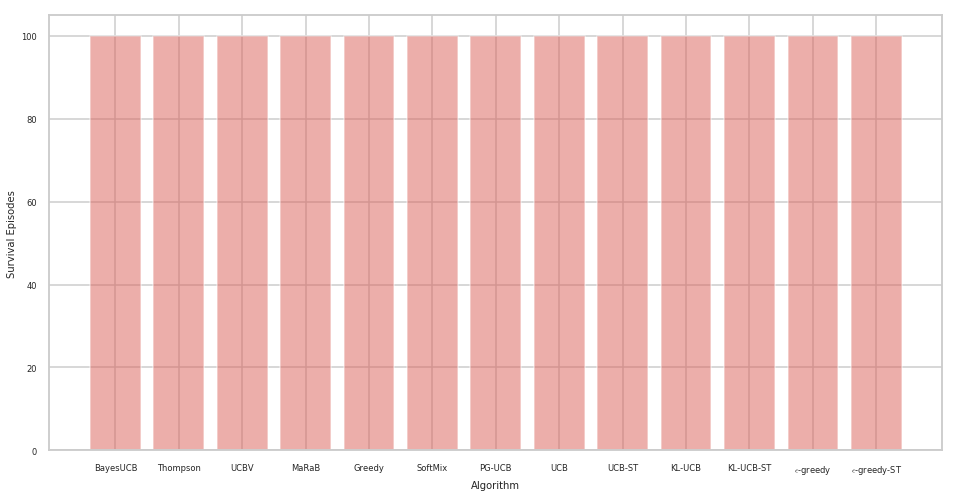

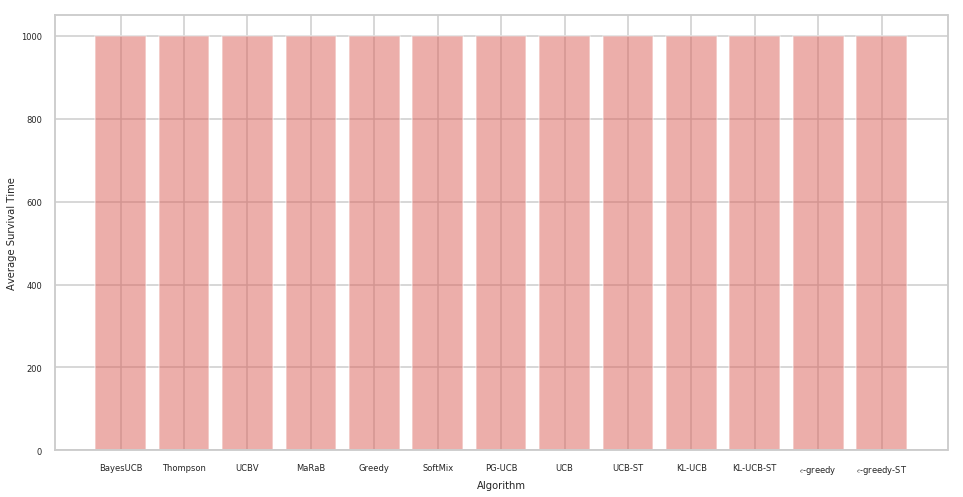

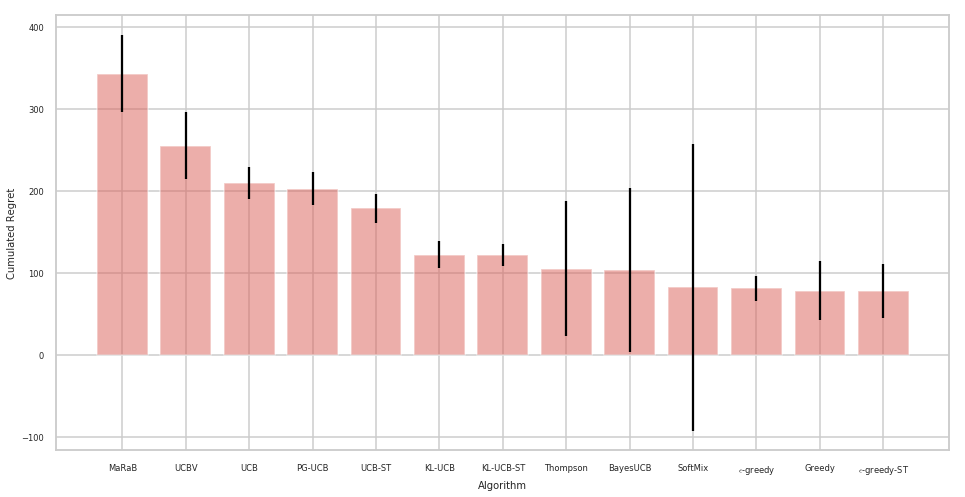

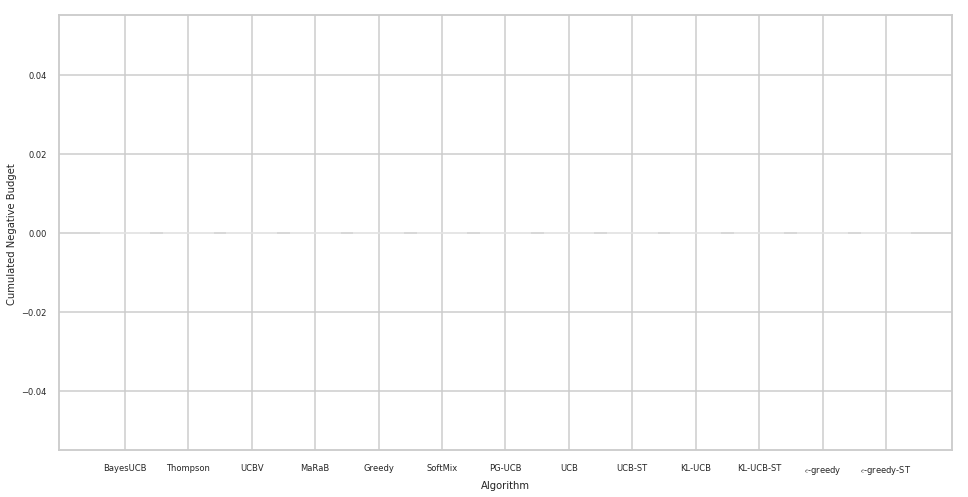

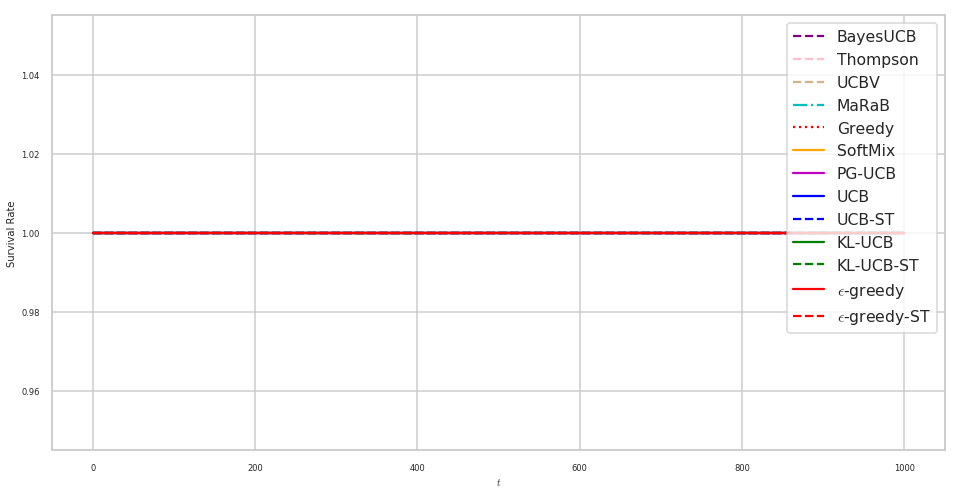

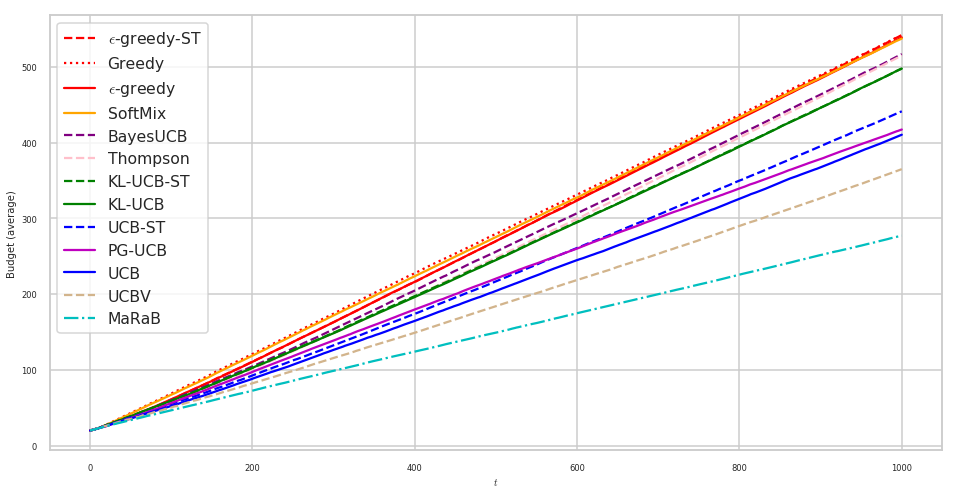

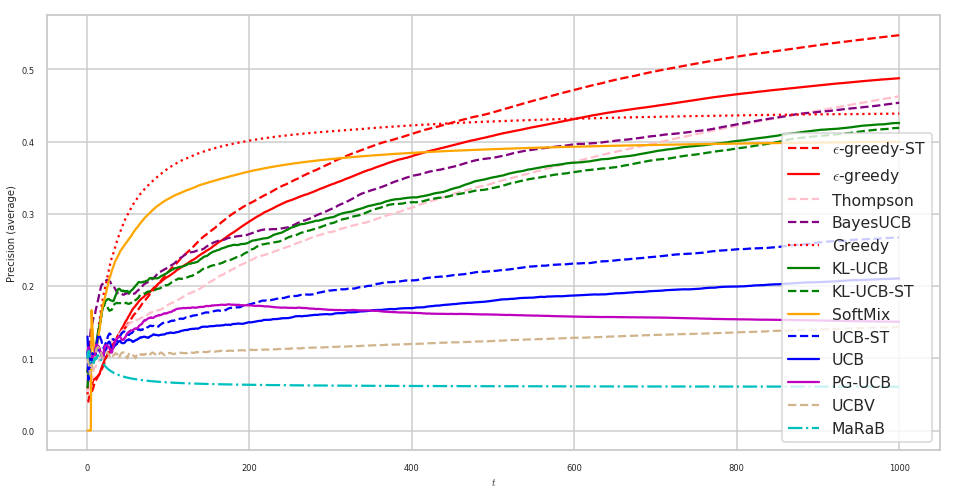

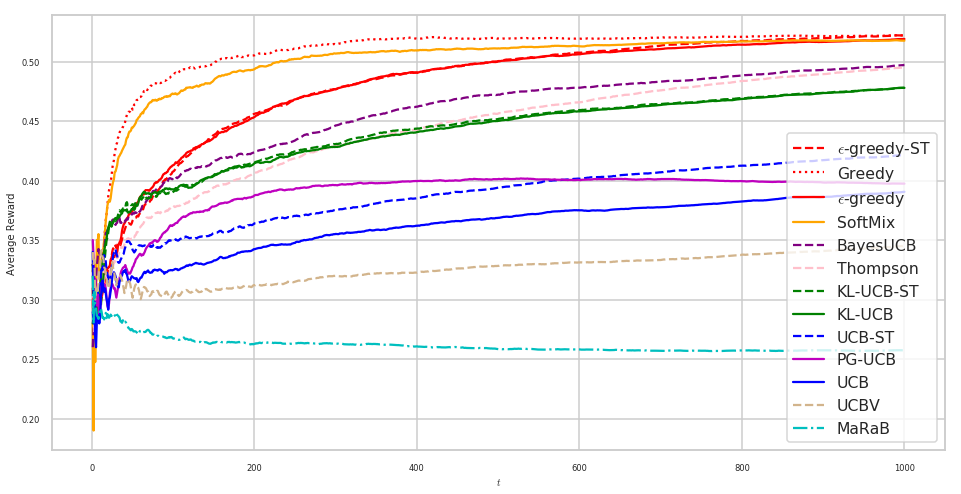

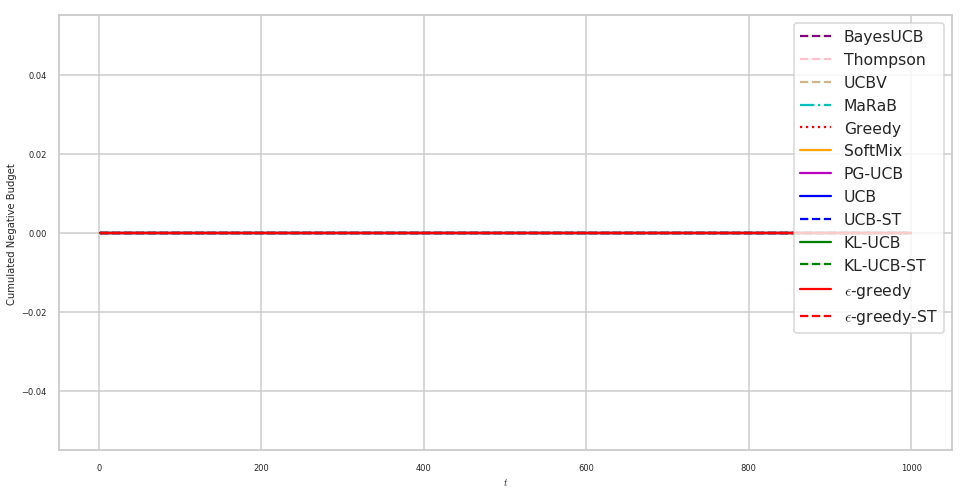

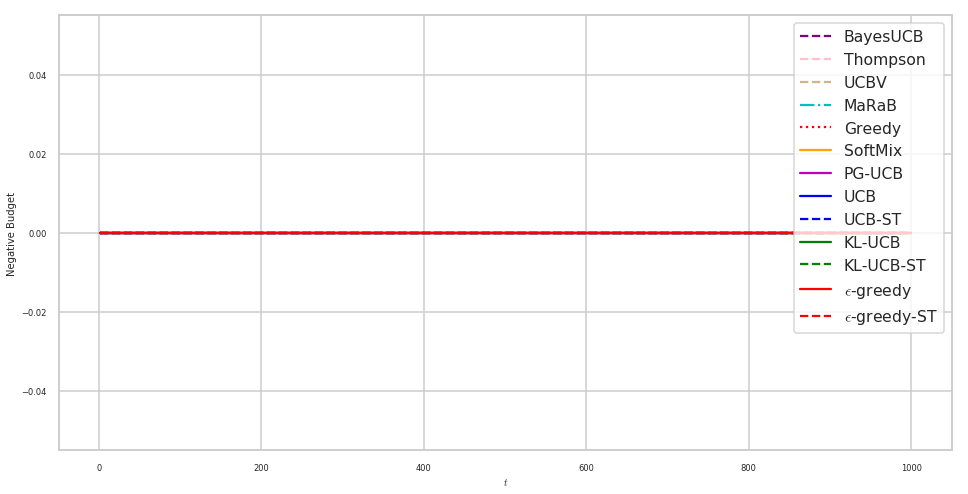

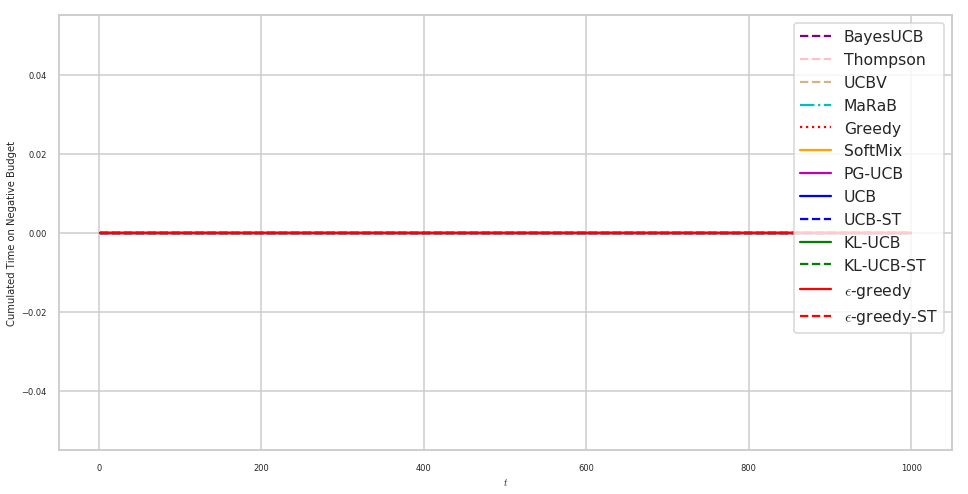

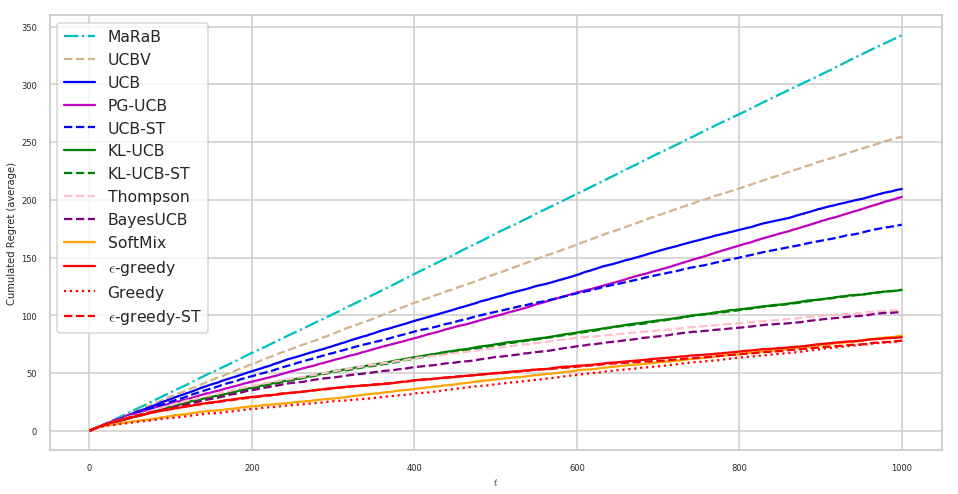

In [40]:
P1 = mabplt(M1)

values = [M1.renb, M1.MTTNB, M1.DTTNB, M1.mstnb, M1.dstnb, M1.msnb, M1.dsnb, M1.msl, M1.dsl]

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P1.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', ylabel="Survival Episodes", compact_view=False, title="") #, filename='images/surv_rate_B_t200.pdf')
P1.plot_comp_algs_survival_time(names=labels, names_rotation='horizontal', compact_view=False, title="") # filename='images/surv_time_B_t200.pdf')
P1.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="") #, filename='images/regret_B_t200.pdf')
P1.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False, title="")


P1.plot_survival_progression(show=False, title="", ylabel="Survival Rate", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/survival_progression_B_t200.pdf')
plt.show()

P1.plot_budget_progression(show=False, title="", ylabel="Budget (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/budget_progression_B_t200.pdf')
plt.show()

P1.plot_precision_progression(show=False, title="", ylabel="Precision (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/precision_progression_B_t200.pdf')
plt.show()

P1.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_cumulated_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_cumulated_regret_progression(show=False, title="", ylabel="Cumulated Regret (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/regret_progression_B_t200.pdf')
plt.show()

#for j, g in enumerate(M1.G):
#    P1.plot_survival_histogram(j=j, title=str(g))

## Simulation Bernoulli : long-horizon

 - Few Repetitions 
 - Long Horizon

In [41]:
#time-horizon
tau = 10000 #15000 

#repetitions
n = 1 #100

M2 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M2.run(tqdm_leave=True)

/usr/local/lib/python3.6/dist-packages/SMPyBandits/Policies/Softmax.py:74: RuntimeWarning: overflow encountered in exp
  trusts = np.exp(rewards / (self.temperature * (1 + self.pulls)))  # 1 + pulls to prevent division by 0


,$\epsilon$-greedy-ST,$\epsilon$-greedy,KL-UCB-ST,KL-UCB,UCB-ST,UCB,PG-UCB,SoftMix,Greedy,MaRaB,UCBV,Thompson,BayesUCB
Survival Episodes Rate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Survival Time (before ruin or end) (averaged over episodes),10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
Survival Time (std dev),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative Time on Negative Budget (averaged over episodes),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative Time on Negative Budget (std dev),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative Negative Budget (averaged over episodes),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative Negative Budget (std dev),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative Regret (averaged over episodes),390.0,314.0,296.0,306.0,672.0,996.0,2039.0,2789.0,698.0,5350.0,1054.0,138.0,187.0
Cumulative Regret (std dev),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


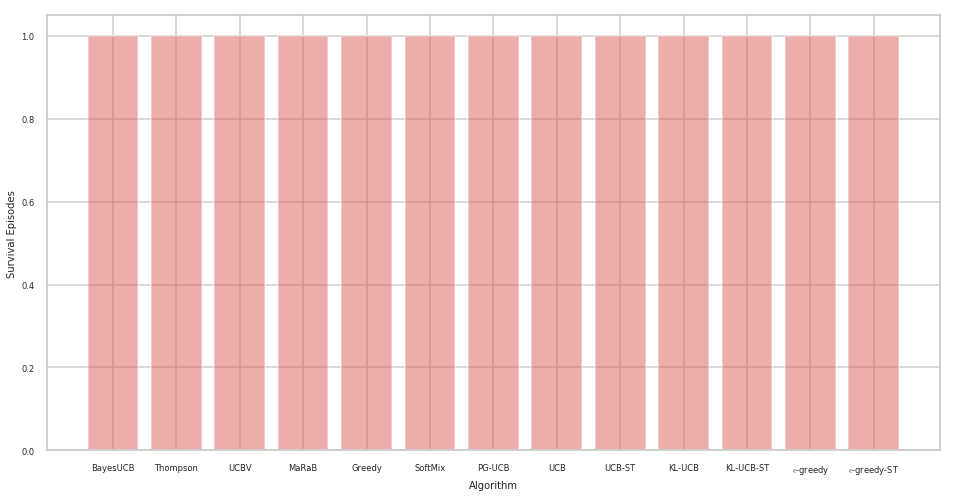

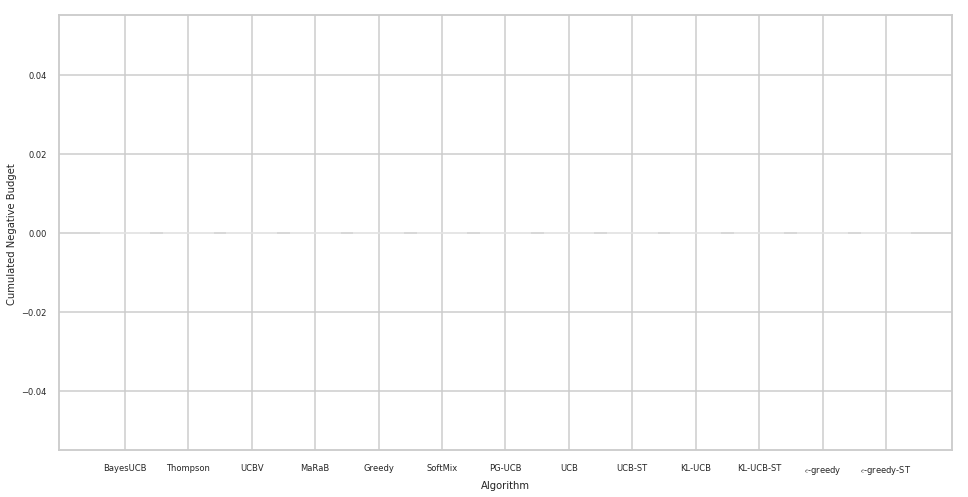

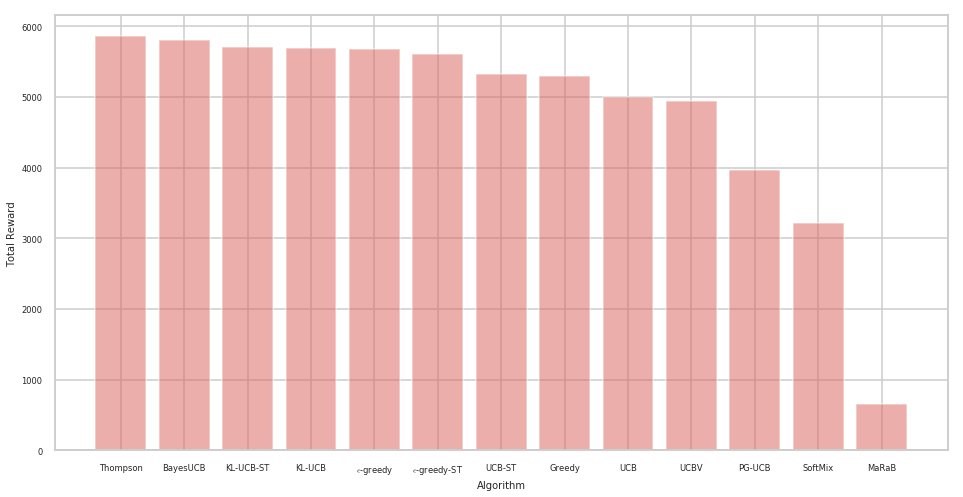

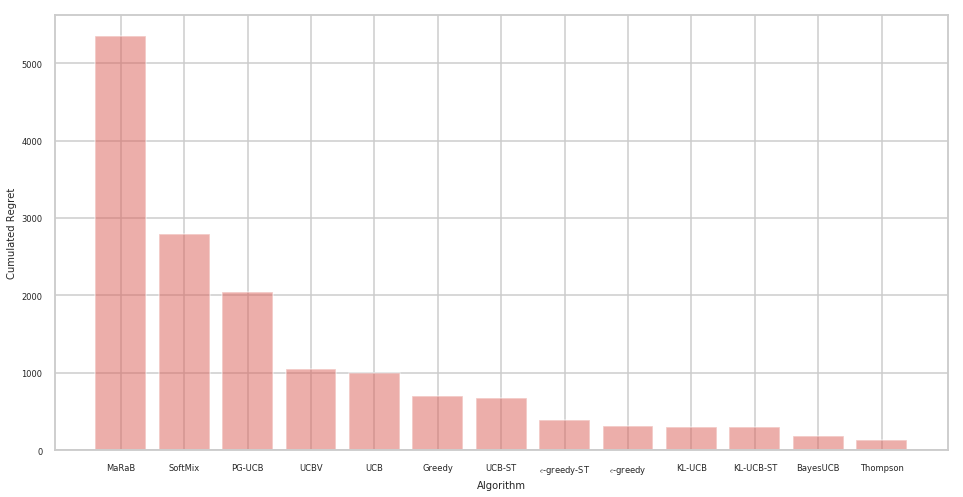

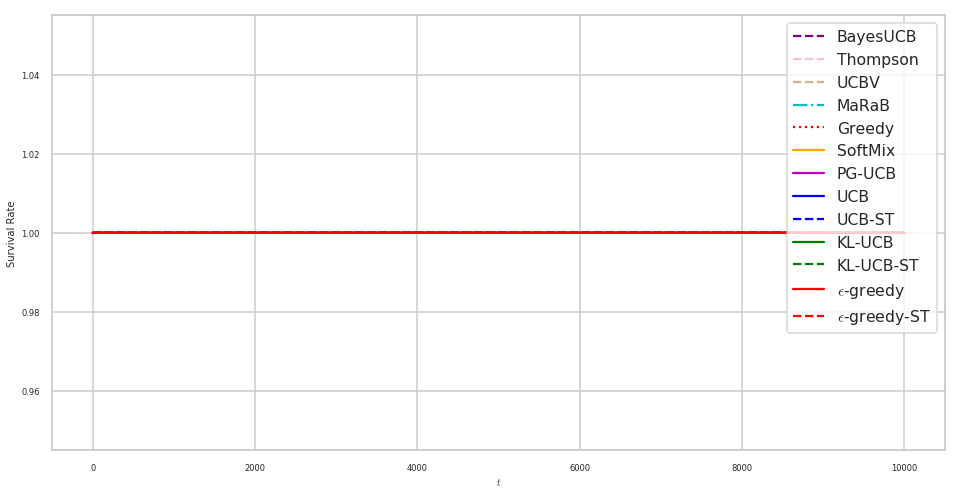

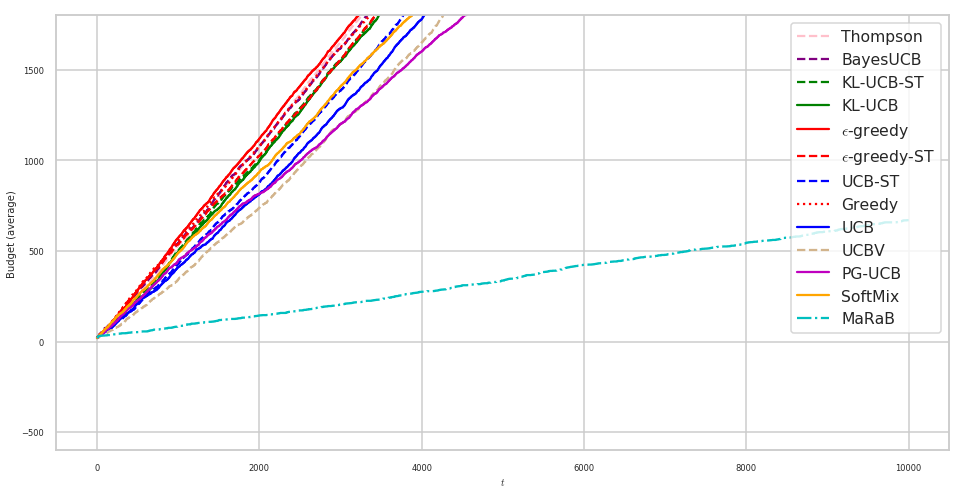

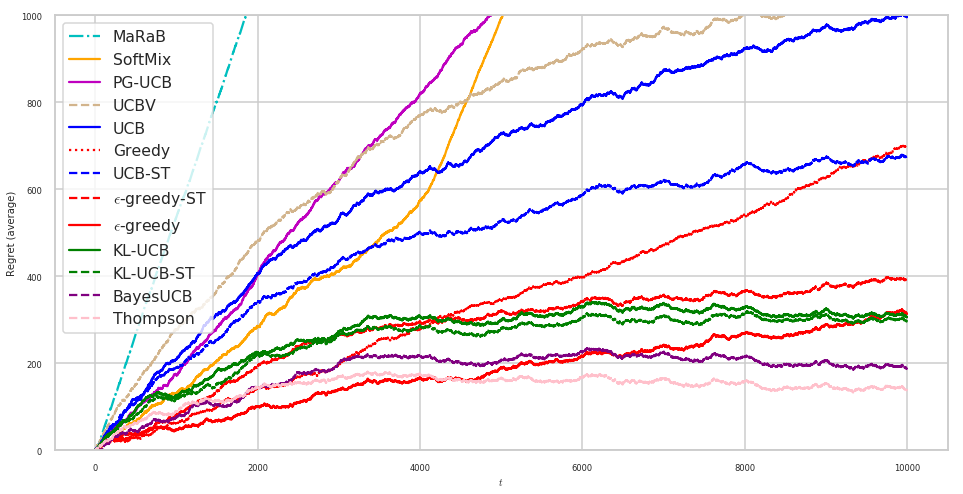

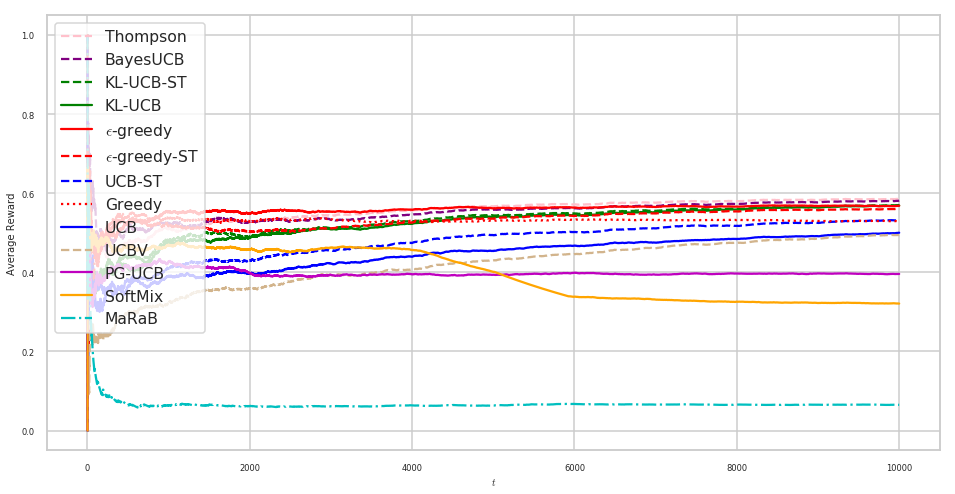

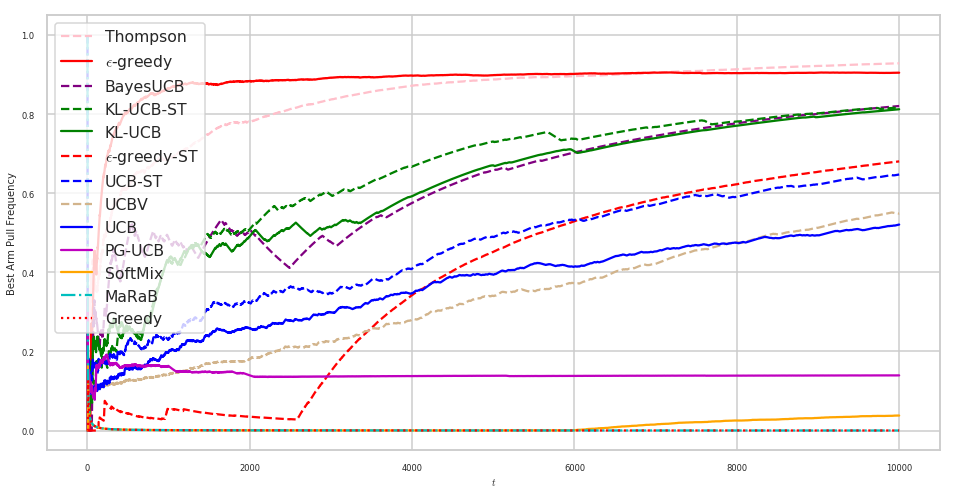

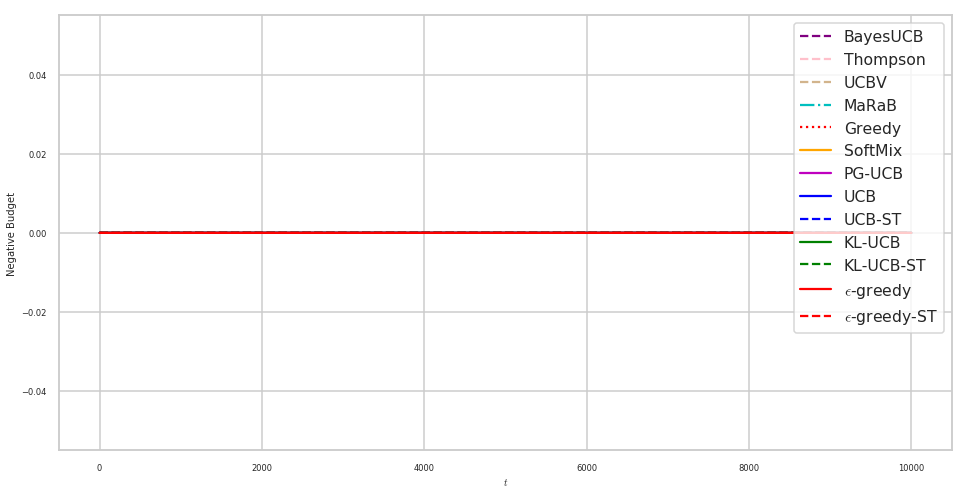

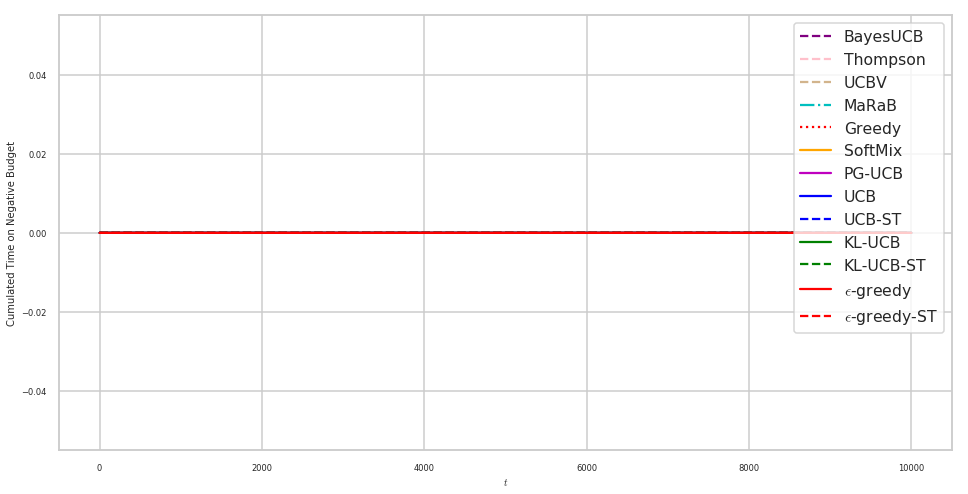

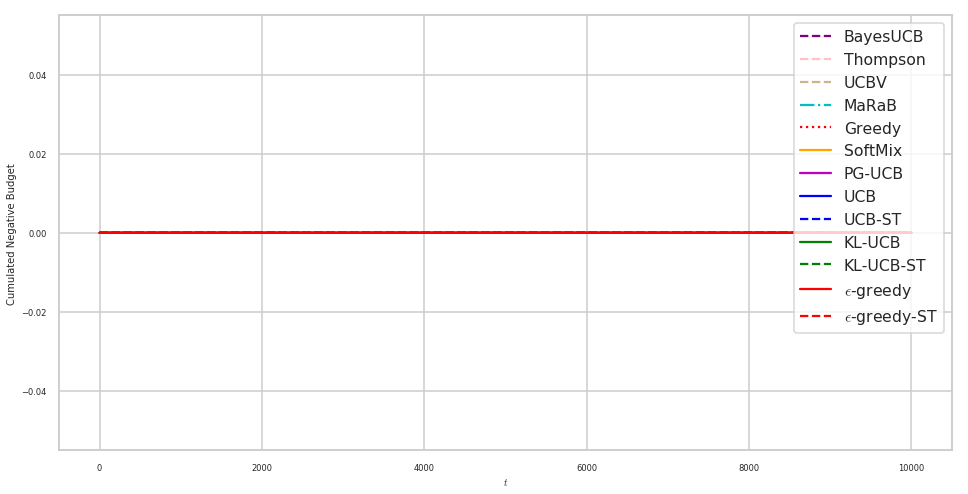

In [42]:
P2 = mabplt(M2)

values = [M2.renb, M2.MTTNB, M2.DTTNB, M2.mstnb, M2.dstnb, M2.msnb, M2.dsnb, M2.msl, M2.dsl]

df = pd.DataFrame(values, crits, labels)
display(df)

P2.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_total_rewards(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="")

P2.plot_survival_progression(show=False, title="", ylabel="Survival Rate", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/survival_progression_B_t10000.pdf')
plt.show()

P2.plot_budget_progression(show=False, title="", ylabel="Budget (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(-600, 1800)
#plt.savefig('images/budget_progression_B_t10000.pdf')
plt.show()

P2.plot_cumulated_regret_progression(show=False, title="", ylabel="Regret (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(0, 1000)
#plt.savefig('images/regret_progression_B_t10000.pdf')
plt.show()

P2.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_precision_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_cumulated_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)